In [9]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df_train = pd.read_csv("/data/MNIST/mnist_train.csv", header=None)

In [15]:
df_test = pd.read_csv("/data/MNIST/mnist_test.csv", header=None)

In [3]:
df_train.shape

(60000, 785)

In [4]:
28 * 28

784

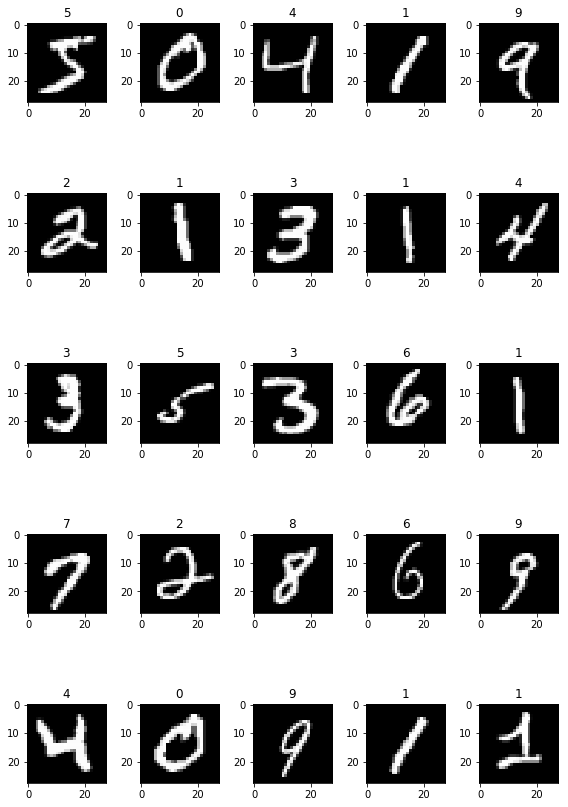

In [13]:
fig, axes = plt.subplots(5, 5, figsize = (8, 12))

for i, ax in enumerate(fig.axes):
    img = df_train.iloc[i, 1:].values.reshape((28, 28))
    ax.imshow(img, cmap="gray")
    ax.set_title(df_train.iloc[i, 0])
    
plt.tight_layout()

In [26]:
X_train = df_train.iloc[:,1:].values/255
y_train = df_train.iloc[:, 0].values

In [27]:
X_test = df_test.iloc[:,1:].values/255
y_test = df_test.iloc[:, 0].values

(array([38847859.,   571880.,   514157.,   438029.,   446644.,   518761.,
          454060.,   518723.,   611860.,  4118027.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

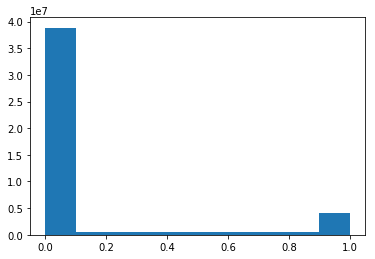

In [28]:
plt.hist(X_train.flatten())

In [29]:
pd.Series(X_train.flatten()).describe()

count    4.704000e+07
mean     1.306605e-01
std      3.081078e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+00
dtype: float64

In [30]:
a = X_train.flatten()

In [31]:
a[a==0].shape

(38045844,)

In [32]:
38045844/len(a)

0.8087977040816327

In [34]:
from sklearn import *

In [37]:
est = linear_model.SGDClassifier(n_jobs=12, tol=1e-5, eta0 = 0.15,  
                                 learning_rate = "invscaling", 
                                 alpha = 0.01, max_iter= 100)
est.fit(X_train, y_train)
print("accuracy", est.score(X_test, y_test), "iterations:", est.n_iter_)

accuracy 0.9079 iterations: 51


In [38]:
import tensorflow as tf

In [39]:
from tensorflow import keras

In [45]:
Y_train = keras.utils.to_categorical(y_train)
Y_test = keras.utils.to_categorical(y_test)
Y_train.shape

(60000, 10)

In [47]:
from time import time

In [52]:
now = time()
tensor_board = keras.callbacks.TensorBoard(log_dir=f"/tmp/tf/{now}/")
model = keras.Sequential([
    keras.layers.InputLayer(input_shape=(784,)),
    keras.layers.Dense(400, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model.summary()
model.compile(keras.optimizers.SGD(lr = 0.015)
              , metrics=["accuracy"]
              , loss=keras.losses.categorical_crossentropy)

model.fit(X_train, Y_train, epochs=25, callbacks= [tensor_board]
            , batch_size=128
            , validation_data=(X_test, Y_test), verbose=1,)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 400)               314000    
_________________________________________________________________
dense_11 (Dense)             (None, 100)               40100     
_________________________________________________________________
dense_12 (Dense)             (None, 10)                1010      
Total params: 355,110
Trainable params: 355,110
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 3s 50us/sample - loss: 0.9038 - acc: 0.7814 - val_loss: 0.4204 - val_acc: 0.8910
Epoch 2/25
60000/60000 [==============================] - 3s 47us/sample - loss: 0.3779 - acc: 0.8962 - val_loss: 0.3157 - val_acc: 0.9120
Epoch 3/25
60000/60000 [==============================] - 3s 47us/sample